In [82]:
import numpy as np

In [ ]:
### Step 1: Load the Dataset
### We begin by loading the Superstore sales dataset to perform exploratory data analysis.

In [81]:
import pandas as pd

In [78]:
df=pd.read_csv('Sample_Superstore_Data.csv')

In [ ]:
### Step 2: Inspect the Data
### We examine the first few rows and structure of the dataset to understand what information it contains.

In [6]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152157,11/8/16,11/11/16,Darrin Van Huff,Corporate,Los Angeles,California,West,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,731.94,3,0.0,219.5820
2,US-2015-108966,10/11/15,10/18/15,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714
3,US-2015-108967,10/11/15,10/18/15,Brosina Hoffman,Home Office,Los Angeles,California,West,Technology,Phones,Cisco SPA 501G IP Phone,213.48,2,0.2,16.7244


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       4 non-null      object 
 1   Order Date     4 non-null      object 
 2   Ship Date      4 non-null      object 
 3   Customer Name  4 non-null      object 
 4   Segment        4 non-null      object 
 5   City           4 non-null      object 
 6   State          4 non-null      object 
 7   Region         4 non-null      object 
 8   Category       4 non-null      object 
 9   Sub-Category   4 non-null      object 
 10  Product Name   4 non-null      object 
 11  Sales          4 non-null      float64
 12  Quantity       4 non-null      int64  
 13  Discount       4 non-null      float64
 14  Profit         4 non-null      float64
dtypes: float64(3), int64(1), object(11)
memory usage: 612.0+ bytes


In [83]:
### Step 3: Clean Column Names
### Standardizing column names makes them easier to reference and work with in code.


In [84]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [10]:
df.describe()

,Sales,Quantity,Discount,Profit
count,4.000000,4.00,4.00,4.000000
mean,305.500000,2.25,0.05,71.272850
std,303.768366,0.50,0.10,99.967744
min,14.620000,2.00,0.00,6.871400
25%,163.765000,2.00,0.00,14.261150
50%,237.720000,2.00,0.00,29.319000
75%,379.455000,2.25,0.05,86.330700
max,731.940000,3.00,0.20,219.582000


In [ ]:
### Step 4: Convert Date Columns
### We convert 'Order Date' and 'Ship Date' to datetime objects for better date manipulation.


In [13]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [14]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4 non-null      object        
 1   Order Date     4 non-null      datetime64[ns]
 2   Ship Date      4 non-null      datetime64[ns]
 3   Customer Name  4 non-null      object        
 4   Segment        4 non-null      object        
 5   City           4 non-null      object        
 6   State          4 non-null      object        
 7   Region         4 non-null      object        
 8   Category       4 non-null      object        
 9   Sub-Category   4 non-null      object        
 10  Product Name   4 non-null      object        
 11  Sales          4 non-null      float64       
 12  Quantity       4 non-null      int64         
 13  Discount       4 non-null      float64       
 14  Profit         4 non-null      float64       
dtypes: datetime64[ns](2), float

In [16]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
df[['Sales','Profit','Discount']].describe()

,Sales,Profit,Discount
count,4.000000,4.000000,4.00
mean,305.500000,71.272850,0.05
std,303.768366,99.967744,0.10
min,14.620000,6.871400,0.00
25%,163.765000,14.261150,0.00
50%,237.720000,29.319000,0.00
75%,379.455000,86.330700,0.05
max,731.940000,219.582000,0.20


In [20]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(3)

Product Name
Hon Deluxe Fabric Upholstered Stacking Chairs    731.94
Bush Somerset Collection Bookcase                261.96
Cisco SPA 501G IP Phone                          213.48
Name: Sales, dtype: float64

In [23]:
df.groupby(['Category','Sub-Category'])['Sales'].sum()

Category         Sub-Category
Furniture        Bookcases       261.96
                 Chairs          731.94
Office Supplies  Labels           14.62
Technology       Phones          213.48
Name: Sales, dtype: float64

In [24]:
df.groupby('Region')['Profit'].sum()

Region
South     48.7850
West     236.3064
Name: Profit, dtype: float64

In [25]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [26]:
import seaborn as sns

In [27]:
%matplotlib inline

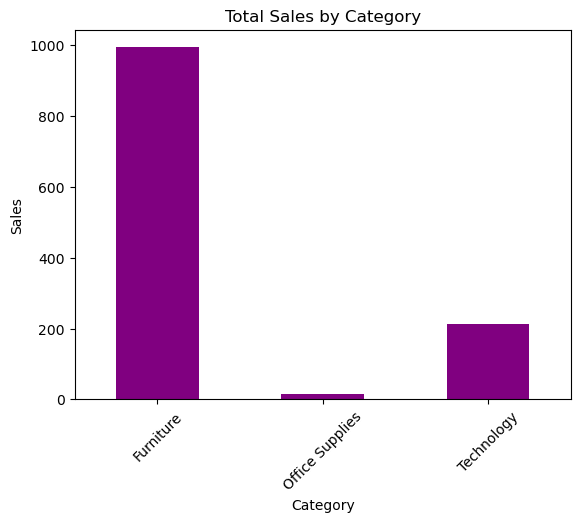

In [32]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='purple')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

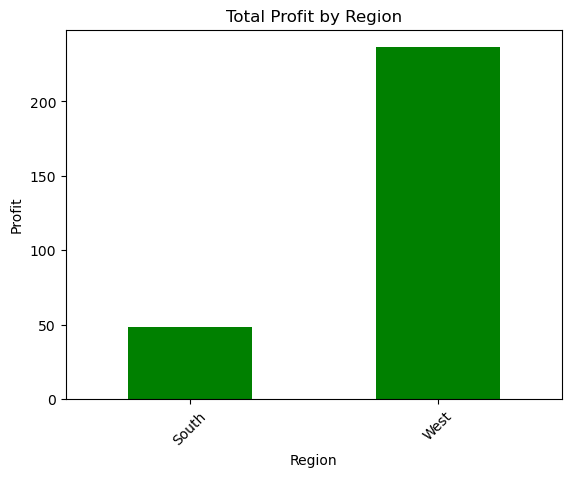

In [36]:
df.groupby('Region')['Profit'].sum().plot(kind='bar', color='green')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Monthly Sales Trend
### This line plot shows how sales trend over time, which helps identify seasonal patterns or growth.


In [38]:
monthly_sales=df.resample('ME',on='Order Date')['Sales'].sum()

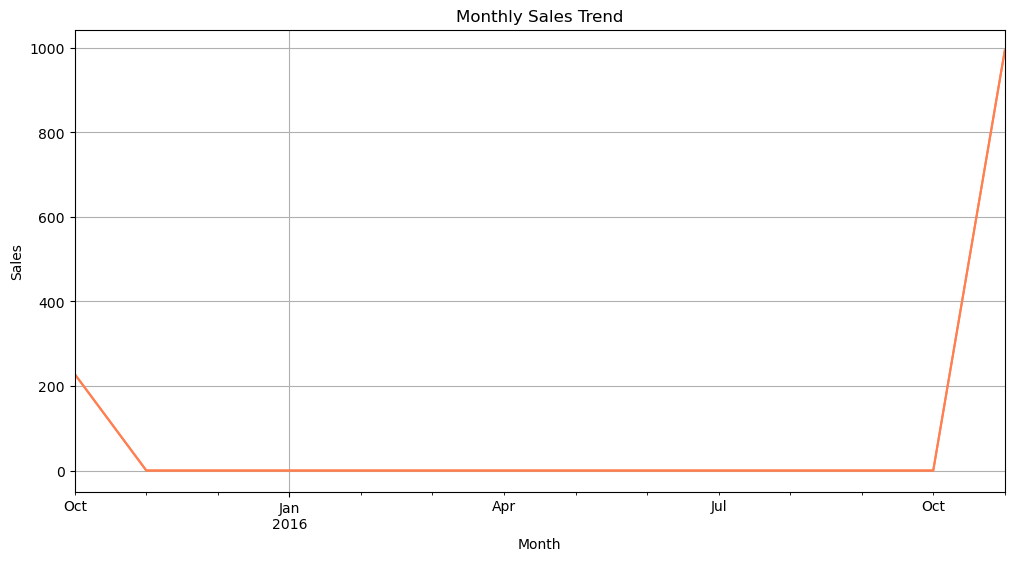

In [40]:
monthly_sales.plot(kind='line', color='coral', figsize=(12,6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
### Top 2 Profitable Products
### Identifying the top 10 products by total profit can guide strategic business decisions and inventory planning.


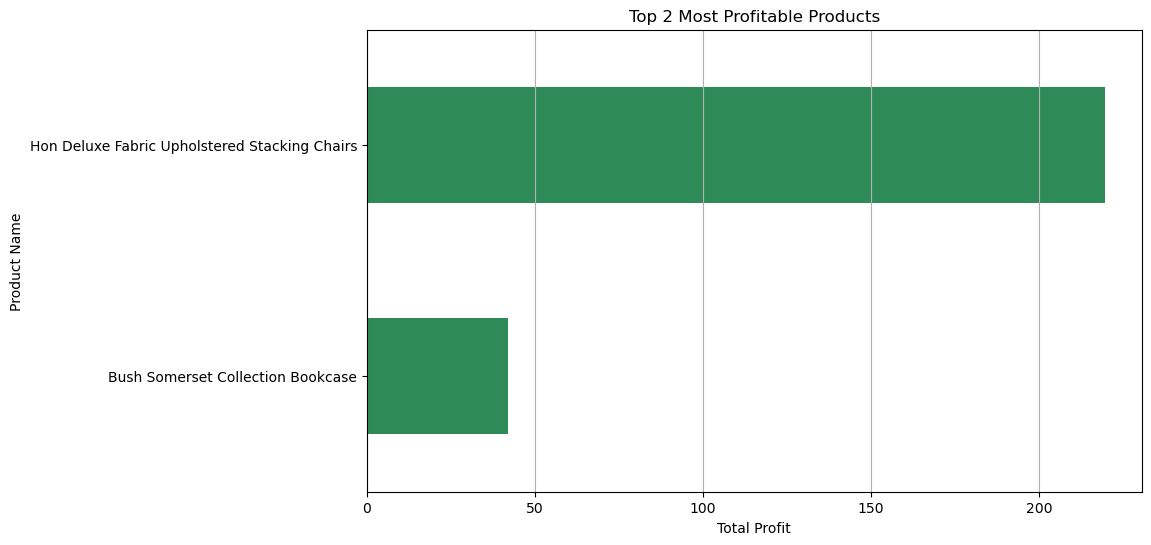

In [57]:
top_products=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(2)
top_products.plot(kind='barh', figsize=(10,6), color='seagreen')
plt.title('Top 2 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # So the most profitable appears at the top
plt.grid(True, axis='x')
plt.show()

In [ ]:
### Most Frequently Sold Sub-Categories
### This chart shows which product sub-categories are sold most often based on quantity, not just revenue.


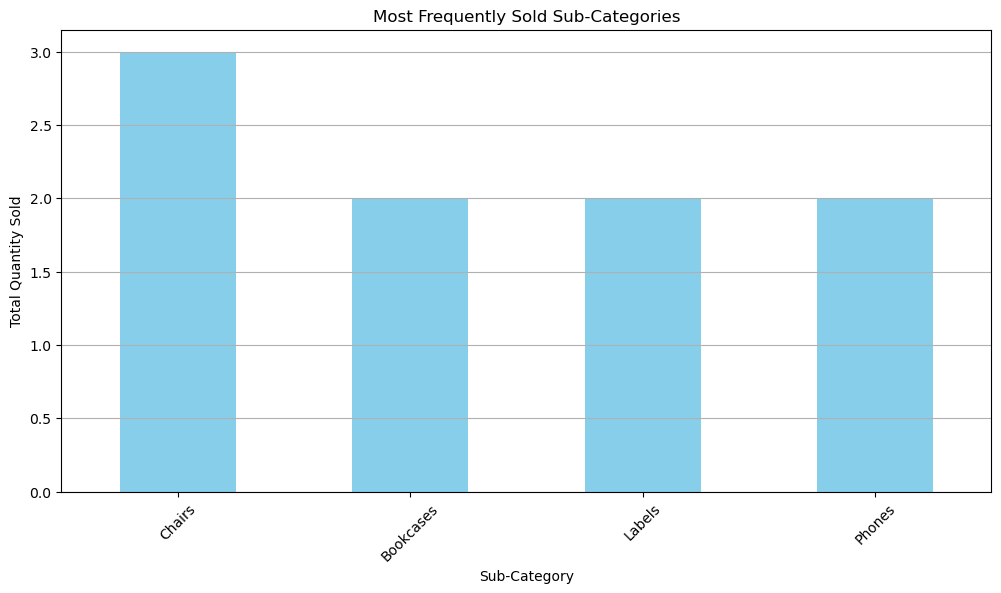

In [47]:
subcat_quantity = df.groupby('Sub-Category')['Quantity'].sum()
subcat_quantity_sorted = subcat_quantity.sort_values(ascending=False)
subcat_quantity_sorted.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Most Frequently Sold Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
### Regional Sales & Profit Breakdown
### We compare total sales and profit across regions to identify strong and weak performing areas.


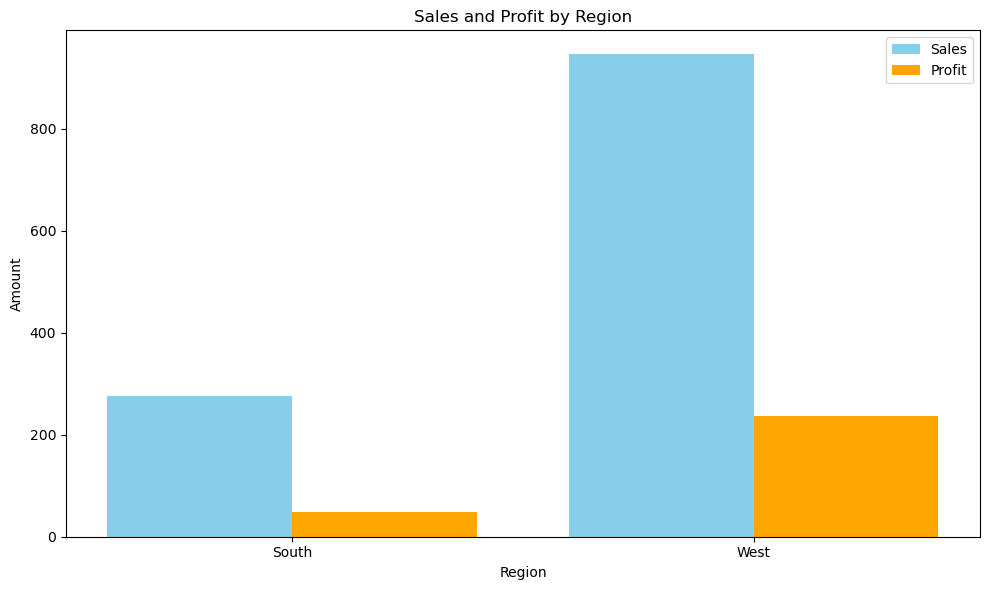

In [48]:
region_data = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(region_data))

plt.bar(index, region_data['Sales'], bar_width, label='Sales', color='skyblue')

plt.bar([i + bar_width for i in index], region_data['Profit'], bar_width, label='Profit', color='orange')

plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales and Profit by Region')
plt.xticks([i + bar_width/2 for i in index], region_data['Region'])
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
### Segment-Wise Profitability
### This section analyzes how different customer segments contribute to profit, which helps in targeted marketing.


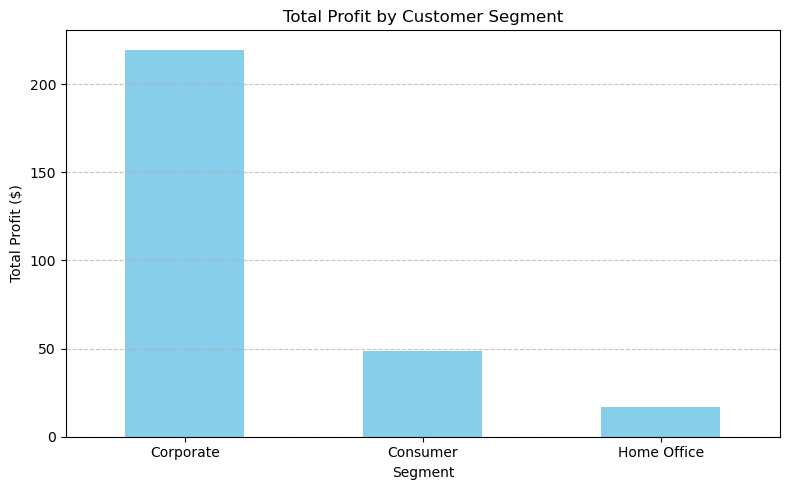

In [63]:

segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

segment_profit.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Total Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
### Discount vs Profit Correlation
### We use a scatter plot to understand if offering higher discounts negatively affects profitability.


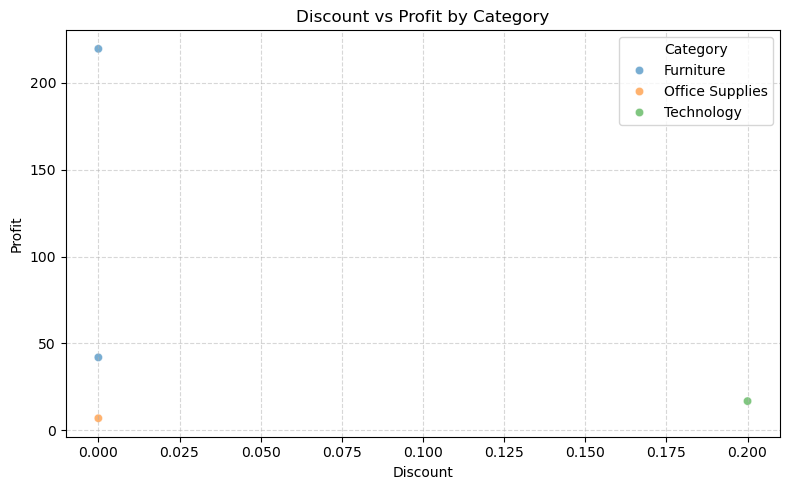

In [64]:
plt.figure(figsize=(8, 5))
# sns -> This draws a scatter plot using the seaborn library
# Uses your DataFrame (df) as the source.
# hue='Category': Uses different colors to represent different product categories (e.g., Furniture, Office Supplies).

sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6) 
plt.title('Discount vs Profit by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

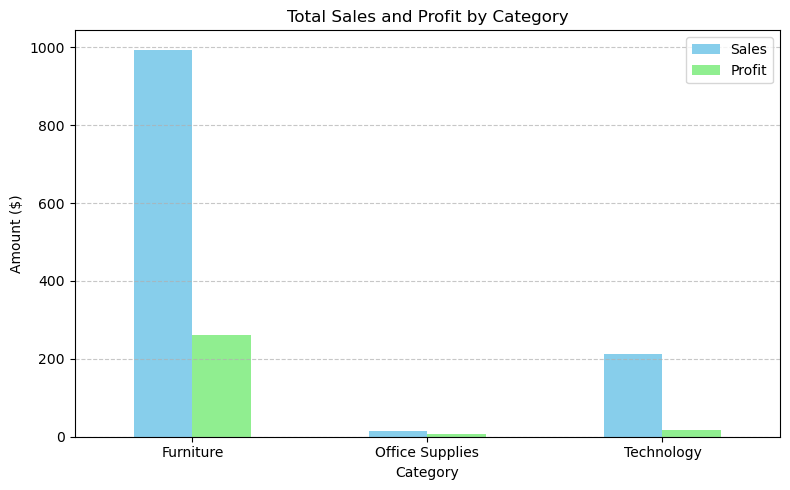

In [65]:
# Grouping data by Category and calculating total Sales and Profit
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Plotting Sales and Profit side by side
category_summary.plot(x='Category', kind='bar', figsize=(8, 5), color=['skyblue', 'lightgreen'])

plt.title('Total Sales and Profit by Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
### Summary Metrics by Region
### We summarize key metrics like total sales, profit, and average discount across regions for quick comparison.


In [72]:
summary_table=df.groupby('Category').agg(
       Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Number_of_Orders=('Order ID', 'nunique'),
    Avg_Discount=('Discount', 'mean')
)
df.reset_index()
print(summary_table)

                 Total_Sales  Total_Profit  Number_of_Orders  Avg_Discount
Category                                                                  
Furniture             993.90      261.4956                 2           0.0
Office Supplies        14.62        6.8714                 1           0.0
Technology            213.48       16.7244                 1           0.2


In [ ]:
### Loss-Making Products
### We list the products that resulted in negative profit — this helps identify what might need reevaluation.


In [73]:

loss_making_products = df.groupby('Product Name')['Profit'].sum().reset_index()

loss_making_products = loss_making_products[loss_making_products['Profit'] < 0]

loss_making_products = loss_making_products.sort_values(by='Profit')

loss_making_products.head(10)

,Product Name,Profit


In [ ]:
### Export Final Data
### Save the cleaned and transformed data to a new CSV file for sharing or future use.


In [74]:
df.to_csv('cleaned_sales_data.csv',index=False)

In [ ]:
### Interactive Dashboard
### This dashboard allows interactive exploration of key metrics using Plotly.

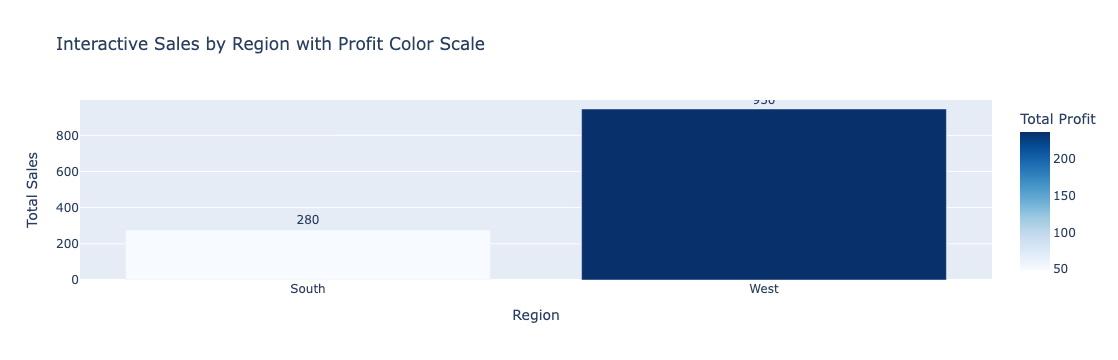

In [87]:
import plotly.express as px

region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()


fig = px.bar(
    region_summary,
    x='Region',
    y='Sales',
    color='Profit',
    title='Interactive Sales by Region with Profit Color Scale',
    text='Sales',
    labels={'Sales': 'Total Sales', 'Profit': 'Total Profit'},
    color_continuous_scale='Blues'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.show()
fig.write_html("dashboard.html", full_html=True, include_plotlyjs='include')